In [8]:
import os
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from sklearn.linear_model import ridge_regression

In [9]:
data = {}
for fn in os.listdir("data"):
    data[fn.split(".")[0]] = np.loadtxt(os.path.join("data", fn), max_rows=5000000)

t = np.arange(0, 5, 0.000001)
du_t_0 = data["Vel_3_1_2D"]
du_t_1 = data["Vel_3_2D"]
du_t_2 = data["Vel_4_1_2D"]
du_t_3 = data["Vel_4_2D"]

# u_0 = integrate.cumulative_trapezoid(du_t_0, t, initial=0)
# u_1 = integrate.cumulative_trapezoid(du_t_1, t, initial=0)
# u_2 = integrate.cumulative_trapezoid(du_t_2, t, initial=0)
# u_3 = integrate.cumulative_trapezoid(du_t_3, t, initial=0)

u_0 = data["Disp_3_1_2D"]
u_1 = data["Disp_3_2D"]
u_2 = data["Disp_4_1_2D"]
u_3 = data["Disp_4_2D"]

# du_tt_0, du_tt_1, du_tt_2, du_tt_3 = [np.zeros_like(du_t_1)] * 4
# du_tt_0[1:] = (du_t_0[1:] - du_t_0[:-1]) / (t[1:] - t[:-1])
# du_tt_1[1:] = (du_t_1[1:] - du_t_1[:-1]) / (t[1:] - t[:-1])
# du_tt_2[1:] = (du_t_2[1:] - du_t_2[:-1]) / (t[1:] - t[:-1])
# du_tt_3[1:] = (du_t_3[1:] - du_t_3[:-1]) / (t[1:] - t[:-1])

du_tt_0 = data["Accel_3_1_2D"]
du_tt_1 = data["Accel_3_2D"]
du_tt_2 = data["Accel_4_1_2D"]
du_tt_3 = data["Accel_4_2D"]

In [10]:
F = np.zeros((4, len(t)))
F[3, :] = np.interp(t, data["t"], data["load"]) * -1e3

U = np.vstack((u_0, u_1, u_2, u_3))
U_T = np.vstack((du_t_0, du_t_1, du_t_2, du_t_3))
U_TT = np.vstack((du_tt_0, du_tt_1, du_tt_2, du_tt_3))

a0, a1 = data["Damp_param"]

X = U + a1 * U_T
Y = F - data["M"] @ (U_TT + a0 * U_T)

K_pred = ridge_regression(X.T, Y.T, 1e-20)

(-0.5, 3.5, 3.5, -0.5)

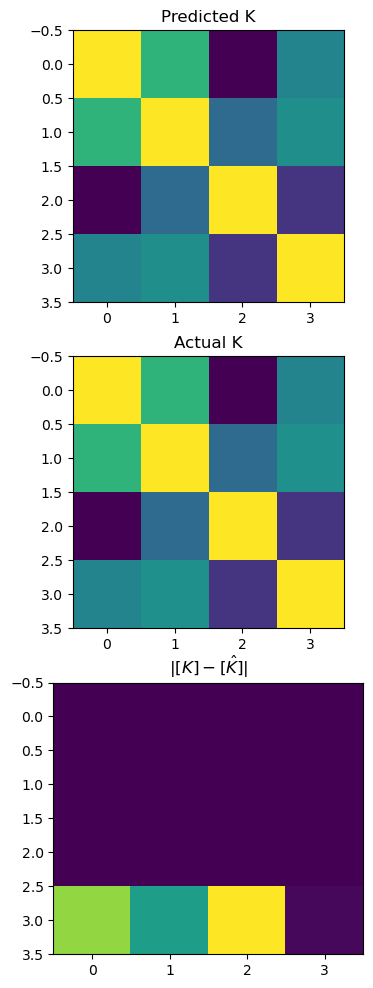

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(4, 12))
ax[0].set_title("Predicted K")
ax[0].imshow(K_pred)
ax[1].set_title("Actual K")
ax[1].imshow(data["K"])
ax[2].set_title(r"$|[K] - [\hat{K}]|$")
ax[2].imshow(np.abs(K_pred - data["K"]))
ax[2].axis('auto')

MAX RESIDUAL: 7.776900292839855


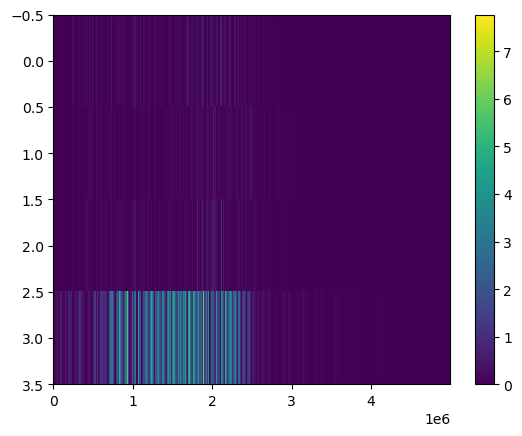

In [12]:
residual = data["M"] @ U_TT + (a0*data["M"] + a1*K_pred) @ U_T + K_pred @ U - F
plt.imshow(np.abs(residual), interpolation='None')
plt.axis('auto')
plt.colorbar()
print("MAX RESIDUAL:", np.abs(residual).max())